## Outline
- Business Case
- EDA

- Batch Normalization 
- EarlyStopping


#Business Case

**Amazon** is facing a high surge of returns on some of its Products, which has led to the downgrade of the company credibility.

So they have appointed you as their Data Scientist:
- To estimate whether customer will return the product or not 
- based on the product description, transportation, importance and prices 

With this, lets load the data:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1K4hCspyd-NGFCFHJb6IVgw0JDu3ckzCt

df = pd.read_csv('Amazon.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1K4hCspyd-NGFCFHJb6IVgw0JDu3ckzCt
To: /content/Amazon.csv
100% 436k/436k [00:00<00:00, 97.9MB/s]


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--| 
|01| **ID** | ID of Customers|
|02| **Warehouse_block** | The Company have big Warehouses which is divided in to block such as A,B,C,D,E| 
|03|**Mode_of_Shipment**|The Company Ships the products in multiple way such as Ship, Flight and Road.|
|04|**Customer_care_calls**|The number of calls made from enquiry for enquiry of the shipment|
|05|**Customer_rating**| The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|06|**Cost_of_the_Product**|Price of the Product|
|07|**Prior_purchases**|The Number of Prior Purchases of the customer|
|08|**Product_importance**|The company has categorized the product in the various parameter such as low, medium, high.|
|09|**Gender**|If Customer is a Male or Female|
|10|**Discount_offered**|Discount offered on that specific product|
|11|**Weight_in_gms**|It is the weight in grams|
|12|**Returned**|It is the target variable, where 1 Indicates that the product is returned|


In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,885,3,low,F,44,1233,1
1,2,F,Flight,4,5,1080,2,low,M,59,3088,1
2,3,A,Flight,2,2,915,4,low,M,48,3374,1
3,4,B,Flight,3,3,880,4,medium,M,10,1177,1
4,5,C,Flight,2,2,920,3,medium,F,46,2484,1


Total Number of samples and features of the data:
<center>

| Records | Features | 
| :-- | :-- | 
| 10999 | 12 | 

In [ ]:
df.shape

(10999, 12)

In [ ]:
X = df.drop(columns=['ID','Returned'])
y = df['Returned']

Splitting the data into Train, Validation and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (7039, 10) (7039,)
Validation: (1760, 10) (1760,)
Test  :  (2200, 10) (2200,)


#EDA



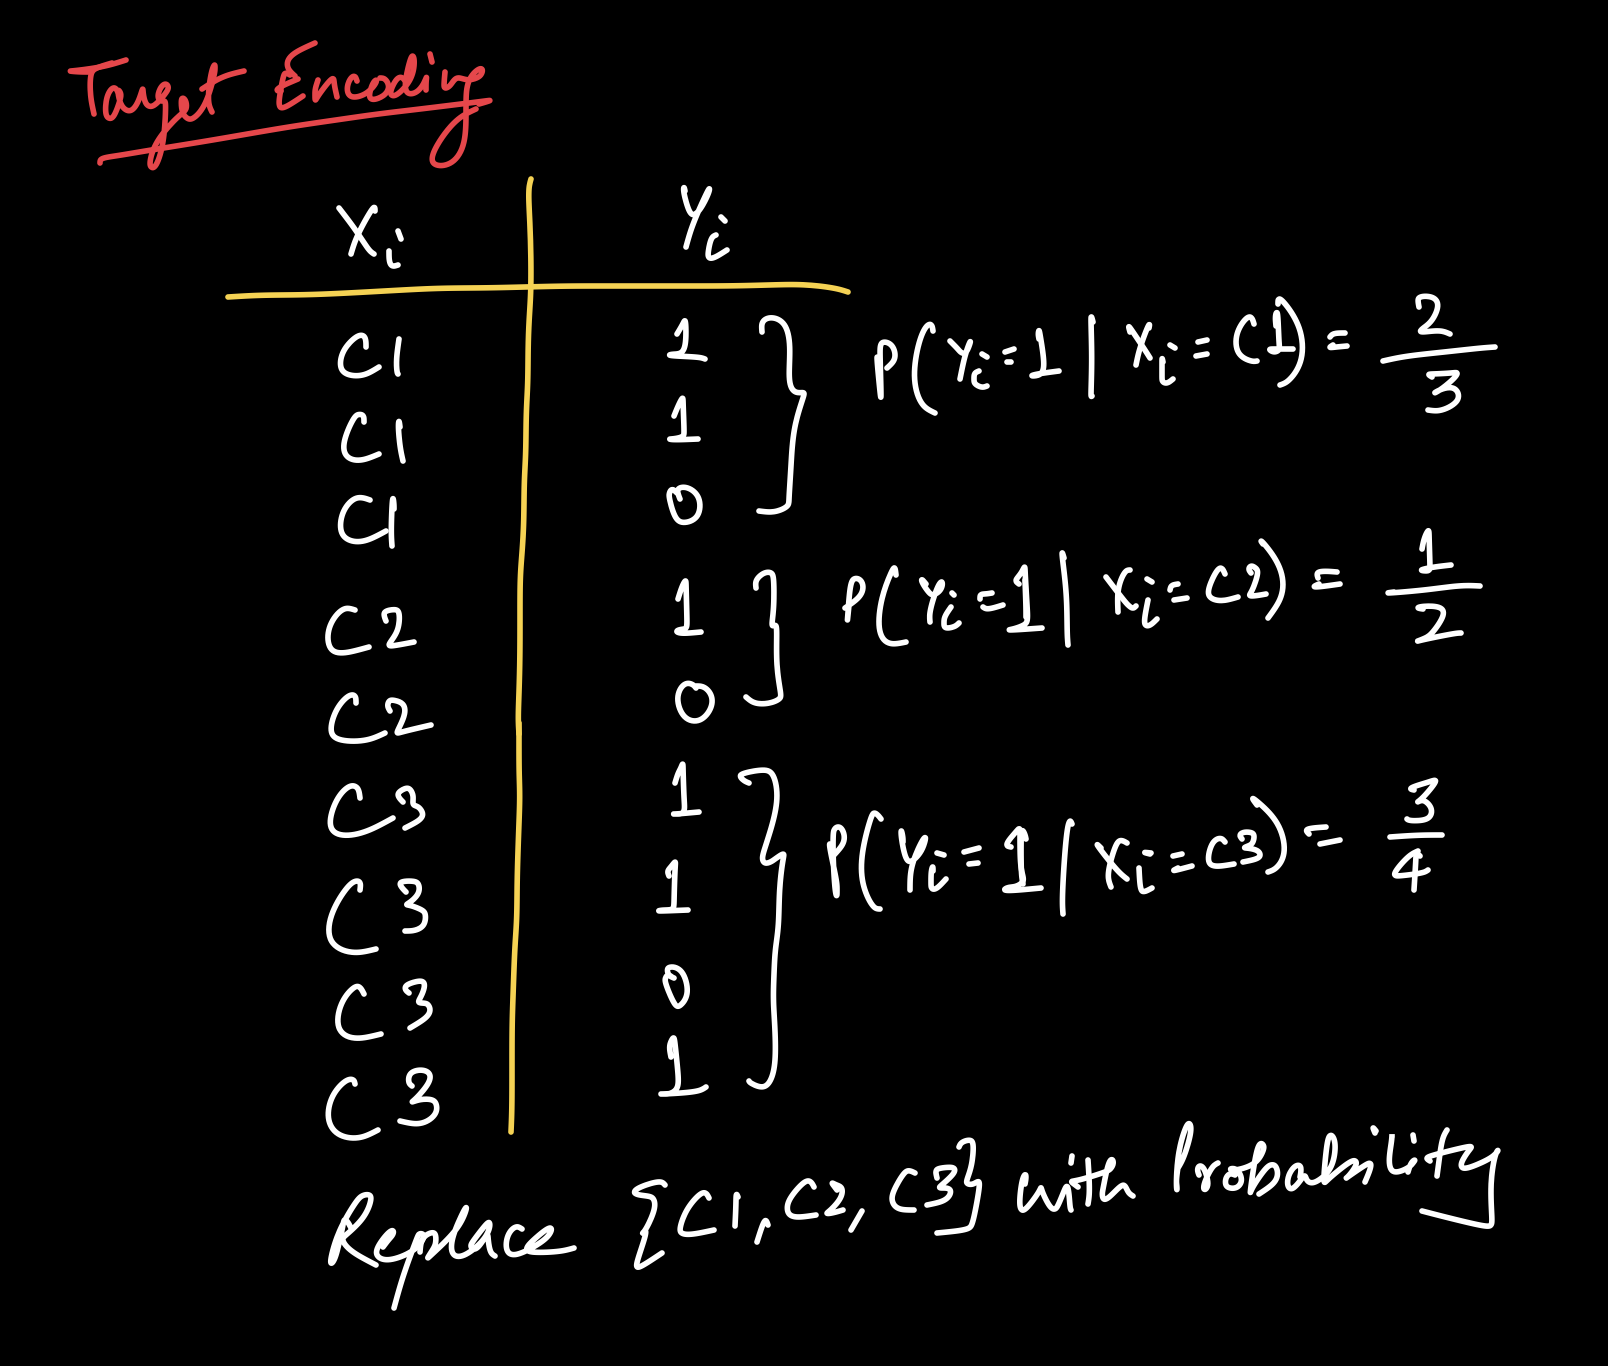

#### Which Encoding to use to transform Categorical features ?

Ans: Since there are many categories in all the Categorical features,
- Which will make the One-Hot Encoding quite large and sparse
- Its better to use Target Encoding



#### How do target encoding ?
Ans: Target Encoding finds the Probability of $y =$(some class$k$) when the Categorical feature $(f) = C_i$ 
- $P(y=k|f=C_i)$
- And replace the all the samples which have feature value as $C_i$ to  $P(y=k|f=C_i)$

```
Suppose y = [0,1] and f = [c1,c2,c3] such that:
- out of 200 samples, 50 samples have y = 1, when f = c1
-  25 samples have y = 1, when f = c2 
-  And, 10 samples have y = 1, when f = c3 
```
#### What is the Target Encoding value for the feature ?

Ans: $P(Y=1 | f= C_1) = \frac{50}{200} = 0.25$
- $P(Y=1 | f= C_2) = \frac{25}{200} = 0.13$
- $P(Y=1 | f= C_3) = \frac{10}{200} = 0.05$

<br>

With this, lets implement Target Encoding


In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder


Converting all the Categorical Features to Numerical 
- using TargetEncoding

In [ ]:
enc = TargetEncoder(cols=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'])
X_train = enc.fit_transform(X_train, y_train)

X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

X_train.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
10286,0.578005,0.608167,6,2,980,2,0.600878,0.596148,10,5180
7746,0.600336,0.600251,4,3,1140,5,0.600878,0.599487,9,1044
1789,0.601109,0.608167,5,2,1155,4,0.586928,0.596148,41,2992
2521,0.601109,0.600251,6,4,1105,10,0.586928,0.596148,42,2972
10404,0.600336,0.576471,5,3,1215,6,0.600878,0.599487,1,1856


#Standardization

**Observe**
- How the data is not Standardized

<br>

Lets Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


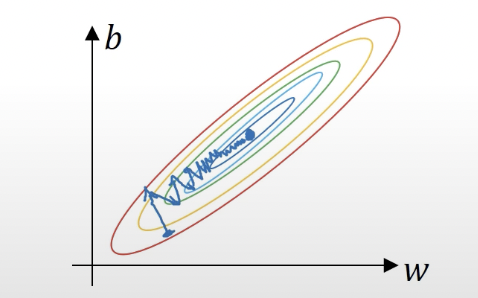

#### What happens if the data is not standardized ?
Ans: if data is not standardized, then suppose:
- if one feature has a range from 1 to 1000, and the other has a range from 0 to 1
- then the weights $w_1$ and $w_2$ assosicated to these features will vary in value alot
 - With $w_1$ being a very high value as compared to $w_2$


Thus the plot for Loss function ( $L(w,b) = \frac{1}{2n} \sum_{i=1}^{i=n} L(\hat{y_i},y_i)$ ) against the weights for n samples: 
- Becomes a squashed, very unsymmetric and closed 

<br>

#### Why there  is an issue with a squashed and closed Loss function plot ? 
Ans: A very small Learning Rate will be required for gradient Descent to reach the global minima 
- thus increasing the number of steps and time 











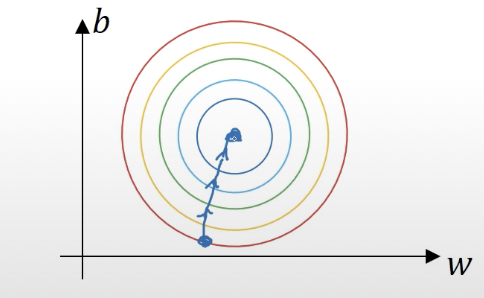

#### What happens when data is standardized ?

Ans: Since now the data is standardized, it makes:
- Range of both the feature 1 and feature 2 from 0 to 1

Thus making the weights for both the features close to each other
- Therefore the plot for Loss function ( $L(w,b)$)becomes
 - Spread out and Symmetric 


#### Why a Spread out and Symmetric Loss function plot works fine ?
Ans: We can use a much large Learning rate to quickly reach the global minima 

# Batch Normalization 


#### What other Hyperparameter tuning techniques we can apply to make the model perform better ?
Ans: Recall that, we always standardize the inputs to the model for Gradient Descent to quickly reach global minima.

Now if we have a four layer NN, such that:

- the output of Layer2 ($a^2$) becomes input for layer 3
- With weight matrix as $W^3$ with bias as $b^3$

<br>

#### Will the input for layer 3 still be in normalized form ?

Ans: **NO**. Clearly, the input to each layer is affected by the weights and biases of the previous layers. 

So now imagine, there due to data being not normalizied
- there is a 0.1% change in data distribution

#### What will happen if this change in distribution goes down a 100 layer Neural Network ?

Ans: This 0.1% change gets amplified when going down the network

- This leads to change in the input distribution to hidden layers of the network 
- and the weights updation gets impacted 

This is whats called an **internal covariate shift**  

<br>

#### Can we normalize $a^2$ so to make $w^3$ and $b^3$ optimum ?

Ans: Yes we can, now if we consider m number of neurons in Layer 2, 
- then $z_i^2.....z_m^2$ becomes the neuron output before the activation function 

<br>

Therefore we can say:

- the mean $μ = \frac{1}{m} ∑_{i=1} ^{i=m} z_i$ 

<br>

- the variance $σ^2 =\frac{1}{m} ∑_{i=1} ^{i=m} (z_i-μ)^2 $

<br>

Then the normalized $z_i$ ($znorm_i$) becomes:
- $znorm_i = \frac{z_i-μ}{\sqrt{σ^2+ϵ}}$
Where ϵ is a very small value $1e^{-10}$ to prevent the denominator to turn 0 when variance is 0

<br>

#### but do we want to have all the hidden layers to have outputs with exact mean = 0  and variance = 1 ?
Ans: No, because if two hidden layers have the same distribution of mean = 0 and variance = 1
- the information learnt about the data for both the layers will be almost same

Thus making the use of the 2nd hidden layer redundant.  



<br>

#### how to make the distribution slightly different for each hidden layer ?

Ans: By scaling and shifting the $znorm_i$ by using two learnable parameters ($γ, β$) such that:

- $ \hat{z_i} = γ \times znorm_i + β $


**Note:** This Entire  process of normalization with scaling and shifting is known as **Batch Normalization** 






Lets now implement Batch Normalization in the Baseline Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu

def create_BatchNormalization_model():
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, kernel_regularizer = L2Reg), 
                    BatchNormalization(),
                    Activation(relu),
                    Dropout(0.2),
                    Dense(128, kernel_regularizer = L2Reg), 
                    BatchNormalization(),
                    Activation(relu),
                    Dense(64,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(1)])
    return model

In [ ]:
model = create_BatchNormalization_model() 

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

Increasing epoch to 15 now

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=15, batch_size=128, verbose=0,callbacks=[tb_callback])


Evaluting the model

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 2ms/step - loss: 2.3278 - accuracy: 0.6453


[2.327779531478882, 0.6452621221542358]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 2.5997 - accuracy: 0.6324


[2.5997164249420166, 0.6323863863945007]

In [ ]:
%tensorboard --logdir={log_folder}

We see after applying Batch Normalization : 
- L2 Regularization worked
- And made the model not overfit the data  

# Early Stopping

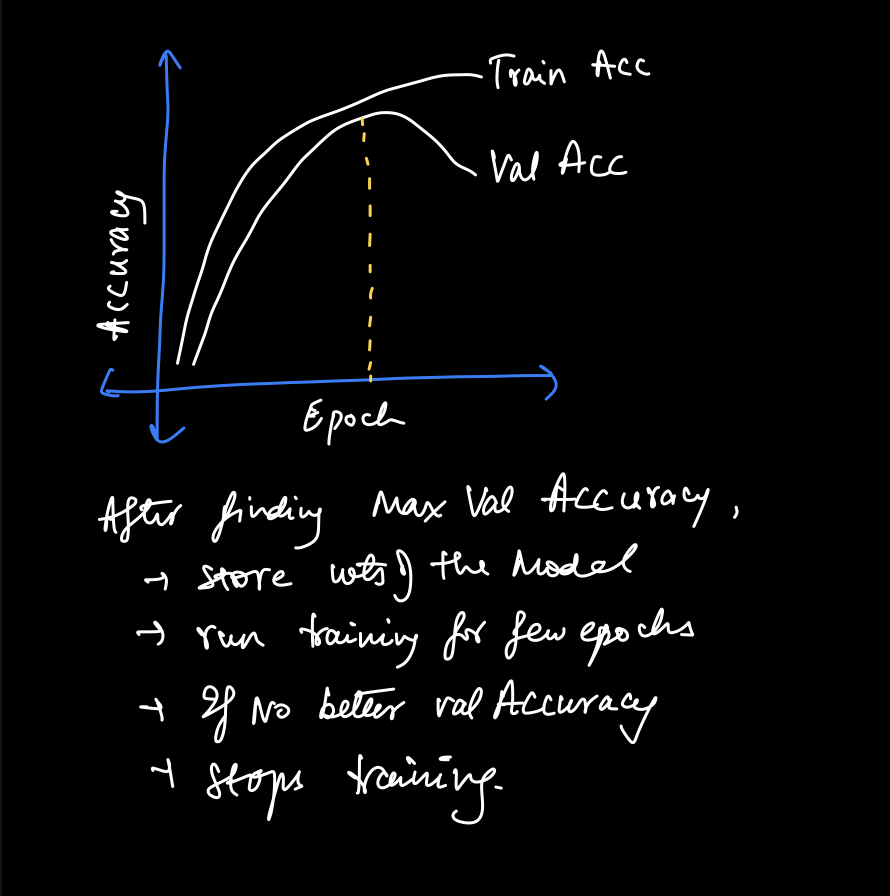

**Observe**

When using Batch Normalization, 
- around epoch 8 the  Validation Accuracy is maximum, 
- and then it starts to decrease

<br>

#### Can there be a way to make the model not update the weights after the validation accuracy reaches maximum ?

Ans:  Yes, by using callbacks to stop the training when:
- The validation accuracy starts decreasing 
- or validation loss starts to increase

<br>

#### How to know if the model has reached maximum validation accuracy  or not?

Ans: By using callbacks such that: 
- One callback stores the weights of model when best validation accuracy is attained
- While the other callback, Stops the training: 
 - after not finding a better validation accuracy, when the model is trained for some epoch ($τ$) 

<br>

**Note**: Keras uses ```EarlyStoppingCallback``` for: 
- stopping the training after no better Validation accuracy attained when ran for some epoch ($τ$)    

Also keras uses another callback  ```ModelCheckpointCallback``` for:
- Storing the weights of the model which had the best Validation Accuracy 





In [ ]:
model = create_BatchNormalization_model() 

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
!rm -rf logs

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

now = datetime.now()
log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)

In [ ]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50,  restore_best_weights=True)
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='tf_model.h5',
                                                             monitor='val_accuracy',
                                                             save_best_only=True,
                                                             mode='max')

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=15, batch_size=128, verbose=0, callbacks=[EarlyStoppingCallback, ModelCheckpointCallback,tb_callback])


In [ ]:
%tensorboard --logdir={log_folder}

Loading the model where the EarlyStopping took place

In [ ]:
model = create_BatchNormalization_model() 
model.build(input_shape =(None,10))

In [ ]:
model.load_weights('tf_model.h5')

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [ ]:
model.evaluate(X_train, y_train)

220/220 [==============================] - 1s 3ms/step - loss: 1.2022 - accuracy: 0.6465


[1.2022379636764526, 0.6465407013893127]

In [ ]:
model.evaluate(X_val, y_val)

55/55 [==============================] - 0s 2ms/step - loss: 1.3301 - accuracy: 0.6301


[1.3301416635513306, 0.6301136612892151]

In [ ]:
model.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 1.2194 - accuracy: 0.6286


[1.2193852663040161, 0.628636360168457]

In [ ]:
output = model.predict(X_test)

69/69 [==============================] - 0s 2ms/step


As```output``` is just the probability of $Y=1$ or $Y=0$ based on the feature X,
- Using a threshold $ γ = 0.5 $ so that ```output``` $\in ${$0,1$} 

In [ ]:
y_pred = np.array([1 if i > 0.5 else 0  for i in output])

Plotting Confusion Matrix 

Text(0.5, -28.828503717825924, 'Predicted label')

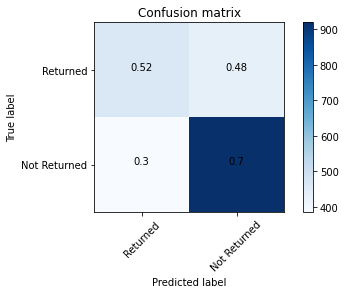

In [ ]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()

class_names = ['Returned','Not Returned']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix.
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
# Use white text if squares are dark; otherwise black.
threshold = cm.max() / 2.
    
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color =  "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


**Observe**

Though the model performs pretty good , it still has a significantly **high False Positive**: 
- Showing that maybe a more complex model might be needed to for a better performance

Plotting ROC Curve

In [ ]:
fpr,tpr,_ = sklearn.metrics.roc_curve(y_test,output.squeeze(axis=1))

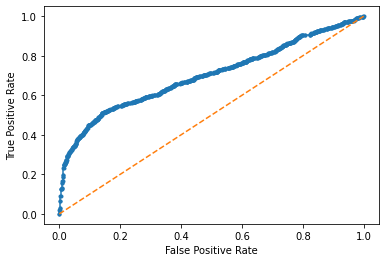

In [ ]:
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()

**observe**

Clearly the model outperforms a mean model 